<a href="https://colab.research.google.com/github/sonpn82/Tensor-flow-Developer-Certification-Exam/blob/main/02_neural_network_classification_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=24)

In [ ]:
# Check out features
X[:10]

array([[-0.04118732,  1.02240395],
       [-0.33642724, -0.97070361],
       [ 0.76363354, -0.17575351],
       [ 0.96327715, -0.32213596],
       [ 0.99811178, -0.1108137 ],
       [ 0.8478336 ,  0.40282307],
       [ 0.77853632,  0.13015867],
       [-0.93240173, -0.19657848],
       [ 0.23205676,  0.68952903],
       [-0.4767542 ,  0.57964927]])

In [ ]:
# Change the labels
y[:10]

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 1])

Our data is a little hard to understand right now... let's visualize it!

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y})
circles

,X0,X1,label
0,-0.041187,1.022404,0
1,-0.336427,-0.970704,0
2,0.763634,-0.175754,1
3,0.963277,-0.322136,0
4,0.998112,-0.110814,0
...,...,...,...
995,0.292466,-0.960276,0
996,-0.380756,-0.918020,0
997,-0.756336,0.644768,0
998,0.223269,-0.777239,1


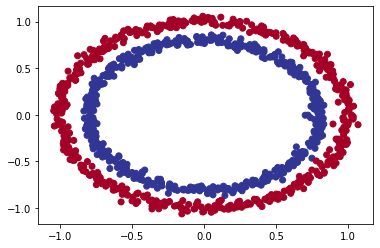

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

**Excercise:** Before pushing forward, spend 1- minutes playing around with playground.tensorflow.org building and running different neural networks. See what happens when you change different hyperparameters.

##Input and output shapes

In [ ]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# How many samples we're working
len(X), len(y)

(1000, 1000)

In [ ]:
# View the 1st example of features and labels
X[0], y[0]

(array([-0.04118732,  1.02240395]), 0)

## Steps in modeling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [ ]:
# Set the random seed
import tensorflow as tf

tf.random.set_seed(42)

#1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)                           
])

#2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

#3. Fit the model
model_1.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 2.0579 - accuracy: 0.4905
Epoch 2/5
32/32 [==============================] - 0s 4ms/step - loss: 0.7274 - accuracy: 0.4985
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7029 - accuracy: 0.5029
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6971 - accuracy: 0.5000
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 0.6947 - accuracy: 0.4998


In [ ]:
# Let's try and improve our model by training for longer...
model_1.fit(tf.expand_dims(X, axis=-1), y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 1s 5ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933020353317261, 0.5]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy... it's performing as if it's guessing.

So let's step things up a notch and add an extra layer.

In [ ]:
# Set the random seed
tf.random.set_seed = 24

#1. Create the model, this time with 2 layers
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)                               
])

#2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

#3. Fit the model
model_2.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose=0)

In [ ]:
#4. Evaluate model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4964


[0.6931541562080383, 0.4964374899864197]

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might add more layers or increase the number of hidden units within a layer.
2. Compile the model - here we might choose a different optimization algorithm  such as Adam instead of SGD.
3. Fitting the model = perhaps we might fit our model for more epochs

In [ ]:
# Set the random seed
tf.random.set_seed = 24

#1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, input_shape=(None, 1)),                               
  tf.keras.layers.Dense(10),                              
  tf.keras.layers.Dense(1)                               
])

#2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#3. Fit the model
model_3.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose=0)

In [ ]:
#4. Evaluate model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6962 - accuracy: 0.5000


[0.6962094902992249, 0.5]

* Note: Whenever your model is performing strangely or there's something going on, remember 3 words: **visualize, visualize, visualize**. Inspect your data, inspect your model, inspect your prediction,

To visual our model's predictions, let's create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class false)

In [26]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  this function is inspired by 2 sources: 
  - cs231n.github.io/neural-networks-case-study
  - github.com/madewithml/basics/blob/master/notebooks
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                      np.linspace(y_min, y_max, 100))
  
  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together - X[x1,x2,x3] & Y[y1,y2,y3] => [[x1,y1],[x2,y2],[x3,y3]]

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


doing multiclass classification


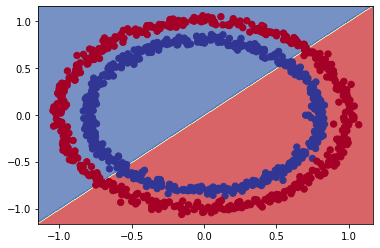

In [ ]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [ ]:
# Let's see if our model can be used for a regression problem
tf.random.set_seed = 24

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X+ 1000

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]


In [ ]:
# Lets' change our model to fit for a regression problem
# Setup the random seed
tf.random.set_seed = 24

#1. Create a model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, input_shape=(None, 1)),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)                               
])

#2. Compile the model, this time with a regression loss function
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

#3. Fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100, verbose=0)

In [ ]:
model_3.evaluate(tf.expand_dims(X_reg_test, -1), y_reg_test)

2/2 [==============================] - 0s 8ms/step - loss: 135.7865 - mae: 135.7865


[135.78648376464844, 135.78648376464844]

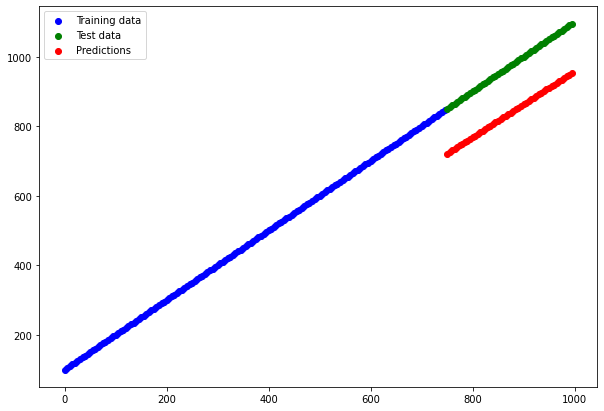

In [ ]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(tf.expand_dims(X_reg_test, axis=-1))

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")

plt.legend()

## The missing piece: Non-linearity

In [ ]:
# Set the random seed
tf.random.set_seed = 24

#1. Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)                               
])

#2. Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

#3. Fit the model
history = model_4.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 2ms/step - loss: 5.2441 - accuracy: 0.4986
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.1094 - accuracy: 0.5012
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.1216 - accuracy: 0.4952
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 5.0615 - accuracy: 0.4980
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 5.0553 - accuracy: 0.4959
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 5.0327 - accuracy: 0.4975
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 5.0199 - accuracy: 0.4931
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 4.9350 - accuracy: 0.4992
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.9165 - accuracy: 0.4979
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.9042 - accuracy: 0.4993
Epoch 11/100
32/32 [=

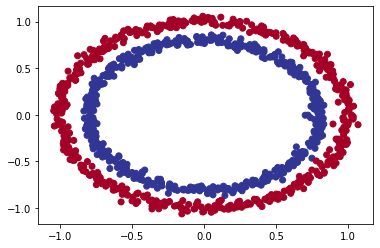

In [ ]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

doing multiclass classification


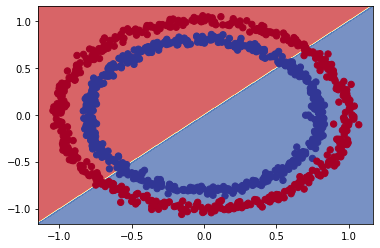

In [ ]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

Let's try build our first neural network with a non-linear activation function

In [ ]:
# Set random seed
tf.random.set_seed = 24

#1. Create a model with a non-linear activiation function
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)                                 
])

#2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

#3. Fit the model
history = model_5.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 1ms/step - loss: 4.3319 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2081 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0815 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0250 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8558 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7604 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.6632 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.5702 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.4900 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.4142 - accuracy: 0.5000
Epoch 11/100
32/32 [=

In [ ]:
#Time to replicate the multi-layer neural network from Tensorflow playground

# Set the random seed
tf.random.set_seed = 24

#1. Create the model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1)                               
])

#2. Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

#3. Fit the model
history = model_6.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 2ms/step - loss: 1.1763 - accuracy: 0.4984
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9530 - accuracy: 0.4985
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8723 - accuracy: 0.5005
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8289 - accuracy: 0.4988
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7936 - accuracy: 0.5024
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7717 - accuracy: 0.4995
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7522 - accuracy: 0.5009
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7406 - accuracy: 0.4994
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7312 - accuracy: 0.4991
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7246 - accuracy: 0.4955
Epoch 11/100
32/32 [=

doing multiclass classification


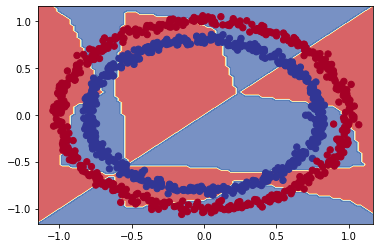

In [ ]:
# How do our model predictions look
plot_decision_boundary(model_6, X, y)

In [ ]:
# Use sigmoid for output layer

# Set random seed
tf.random.set_seed = 24

# Create a model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history = model_7.fit(X, y, epochs=100, verbose=0)

In [ ]:
# Evaluate our model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.2364 - accuracy: 0.9850


[0.2364272177219391, 0.9850000143051147]

doing binary classification


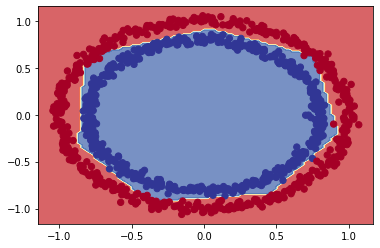

In [ ]:
# Let's visualize our metrics
plot_decision_boundary(model_7, X, y)

**Questions:** What's wrong the predictions we've made? Are we really evaluating our model correctly? Hint: What data di the model learn on and what data did we predict on?

**Note:** The combination of **linear (straight lines) and non-linear (non-straight lines) function** is one of the key fundamentals of nerual networks.

Now

Now we've discussed the concept of linear and non-linear functions (or lines), let's see them in action.

In [ ]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

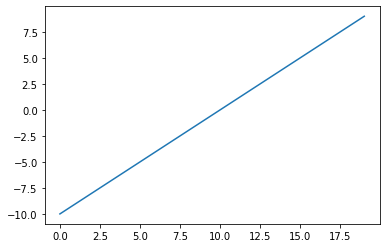

In [ ]:
# Visualize our toy tensor
plt.plot(A)

In [ ]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1/(1+tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

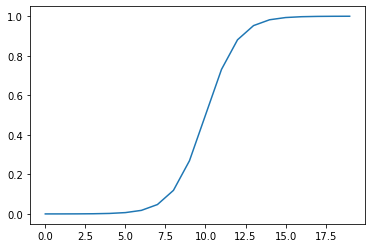

In [ ]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [ ]:
# Let's recreate the relu function
def relu(x):
  return tf.maximum(0, x)

# Pass our toy tensor to our customer relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

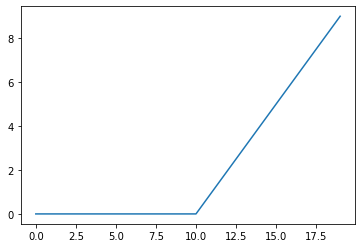

In [ ]:
# Plot ReLU-modified tensor
plt.plot(relu(A))

In [ ]:
# Let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

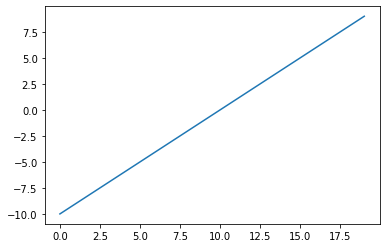

In [ ]:
# Does the linear activation function change anyting?
plt.plot(tf.keras.activations.linear(A))

In [ ]:
# Does A even change?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classification

So far we've been training and testing on the same dataset...

However, in machine learning this is basically a sin.

So let's create a training and test set.

In [ ]:
# Check how many examples we have
len(X)

1000

In [ ]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape,  y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
# Let's recreate a model to fit on the training data and evaluate on the test data

# Set random seed
tf.random.set_seed = 24

#1. Create the model (same 7)
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),                               
  tf.keras.layers.Dense(4, activation="relu"),                               
  tf.keras.layers.Dense(1, activation="sigmoid"),                               
])

#2. Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

#3. Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6894 - accuracy: 0.4900
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6842 - accuracy: 0.5938
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6798 - accuracy: 0.5638
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6692 - accuracy: 0.6662
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6507 - accuracy: 0.6338
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6339 - accuracy: 0.6775
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5994 - accuracy: 0.7625
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5640 - accuracy: 0.7625
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5211 - accuracy: 0.7900
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.4827 - accuracy: 0.8462
Epoch 11/25
25/25 [

In [ ]:
#4. Evaluate the model on test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0516 - accuracy: 0.9900


[0.051636748015880585, 0.9900000095367432]

doing binary classification
doing binary classification


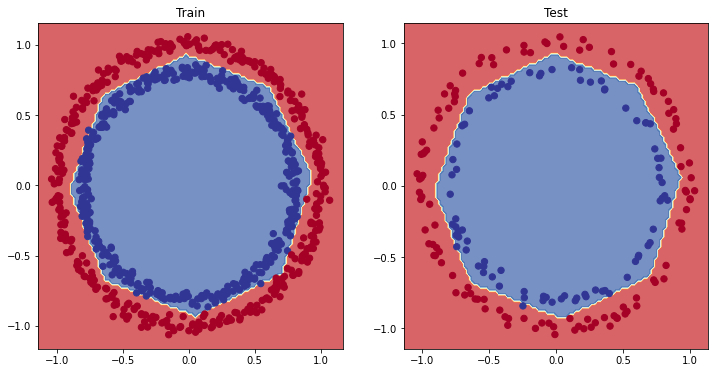

In [ ]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

## Plot the loss (or training) curves

In [ ]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.689359,0.49000
1,0.684237,0.59375
2,0.679842,0.56375
3,0.669247,0.66625
4,0.650700,0.63375
5,0.633873,0.67750
6,0.599419,0.76250
7,0.563991,0.76250
8,0.521121,0.79000
9,0.482681,0.84625


Text(0.5, 1.0, 'Model_8 loss curves')

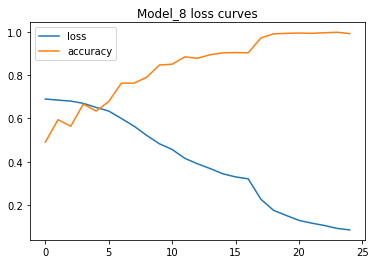

In [ ]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")

**Note:** For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth lables).

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of funcitonality, you can add to your *while* its training.
* Another model (we could use the same one as above, but we're practicing building models here).
* A modified curves plot.

In [ ]:
# Set random seed
tf.random.set_seed = 24

# Create a model (same 8)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid"),
])

# Compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model (passing lr_scheduler as callback)
history_9 = model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 4ms/step - loss: 0.6927 - accuracy: 0.4938 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.4988 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.4988 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5025 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6923 - accuracy: 0.5050 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5038 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6920 - accuracy: 0.5013 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.5013 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss:

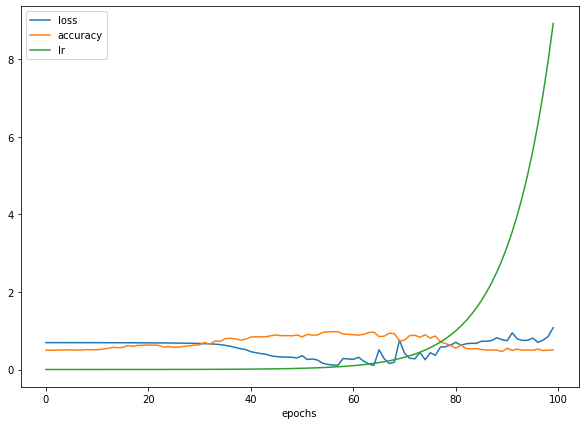

In [ ]:
# Checkout history object
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs Loss')

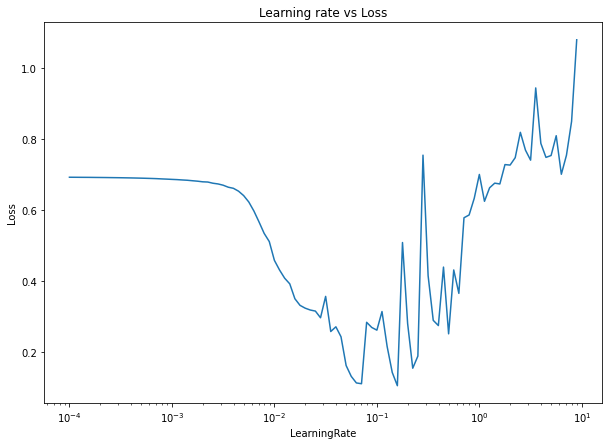

In [ ]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("LearningRate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

In [ ]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [ ]:
# Let's try using a higher ideal learning rate with the same model

# Set random seed
tf.random.set_seed = 24

# Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),                                
  tf.keras.layers.Dense(4, activation="relu"),                                
  tf.keras.layers.Dense(1, activation="sigmoid"),                               
])

# Compile the model
model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(lr=0.02),
                 metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than model 8)
history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 1s 3ms/step - loss: 0.7020 - accuracy: 0.4700
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6854 - accuracy: 0.5600
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6737 - accuracy: 0.6350
Epoch 4/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6550 - accuracy: 0.7212
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6192 - accuracy: 0.6787
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5931 - accuracy: 0.7200
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5555 - accuracy: 0.7350
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5093 - accuracy: 0.7775
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4649 - accuracy: 0.8250
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4405 - accuracy: 0.8300
Epoch 11/20
25/25 [===========

In [ ]:
# Evaluate model 10 on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.1037 - accuracy: 0.9950


[0.10369569063186646, 0.9950000047683716]

In [ ]:
# Evaluate model 8 on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0587 - accuracy: 1.0000


[0.058661650866270065, 1.0]

doing binary classification
doing binary classification


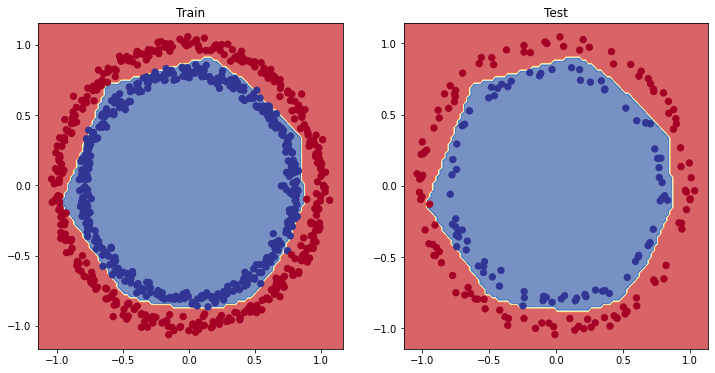

In [ ]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

## More classification evaluation methods

Alongside visualizing our models results as much as possible, there are a handful of other classification evaluation methods & metrics you should be familiar with:

* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from scikit-learn)

In [ ]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.1037 - accuracy: 0.9950
Model loss on the test set: 0.10369569063186646
Model accuracy on the test set: 99.50%


How about a confusion matrix?

In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_preds)

ValueError: ignored

In [ ]:
y_test[:10]

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 0])

In [ ]:
y_preds[:10]

array([[0.84044075],
       [0.58007574],
       [0.08919248],
       [0.91864413],
       [0.05612421],
       [0.91864413],
       [0.83716166],
       [0.00435883],
       [0.06856617],
       [0.09208325]], dtype=float32)

Oops... looks like our predictions array has come out in **prediction probability** form... the standard output from the sigmoid (or softmax) activation functions.

In [ ]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.]], dtype=float32)>

In [ ]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[116,   1],
       [  0,  83]])

How about we prettify our confusion matrix?

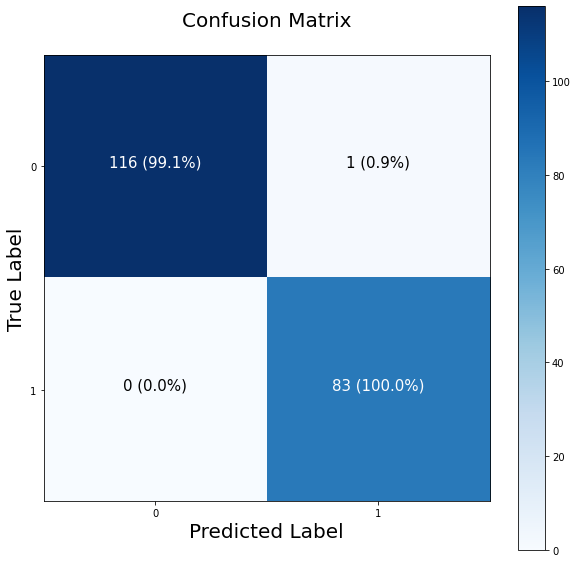

In [ ]:
# Note: the confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix

import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)

# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis label to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

## Working with a larger example (multi-class classification)

When you have more than two classes as an option, it's known as **multi-class classification**.
* This means if you have 3 different classes, it's multi-class classification.
* It also means if you have 100 different classes, it's multi-class classification.

To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

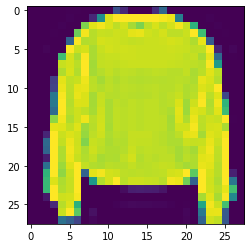

In [ ]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [ ]:
# Check out samples label
train_labels[7]

2

In [ ]:
# Create a small list so we can index onto our training labels so they're human-readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Coat')

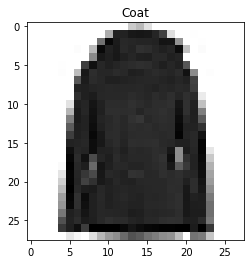

In [ ]:
# Plot an example image and its label
index_of_choice = 2000
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

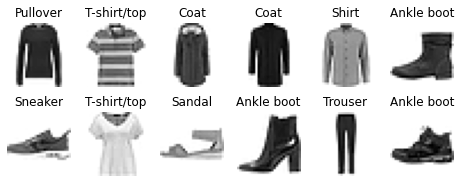

In [ ]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(8,3))
for i in range(12):
  ax = plt.subplot(2, 6, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classification model

For our multi-class classification model, we can use a similar architecture to our binary classifiers, however, we've going to have to tweak a few things:
* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
  * If your labels are one-hot encoded, use CategoricalCrossentropy()
  * If your labels are integer form use SparseCategoricalCrossentropy()
* Output layer activation = Softmax (not Sigmoid)

In [ ]:
# our data needs to be flattended (from 28*28 to None*784)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28))])
flatten_model.output_shape

(None, 784)

In [ ]:
# Set random seed
tf.random.set_seed = 24

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(4, activation="relu"),                                
  tf.keras.layers.Dense(4, activation="relu"),                                
  tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)  
])

# Compile the model
model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                tf.one_hot(train_labels, depth=10),
                                epochs=10,
                                validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3602 - accuracy: 0.1019 - val_loss: 2.2998 - val_accuracy: 0.1016
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2614 - accuracy: 0.1194 - val_loss: 2.2398 - val_accuracy: 0.1307
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.0718 - accuracy: 0.1744 - val_loss: 1.8322 - val_accuracy: 0.2044
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7770 - accuracy: 0.2304 - val_loss: 1.7282 - val_accuracy: 0.2532
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7157 - accuracy: 0.2486 - val_loss: 1.6823 - val_accuracy: 0.2618
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6795 - accuracy: 0.2679 - val_loss: 1.6584 - val_accuracy: 0.2872
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6622 - accuracy: 0.2794 - val_loss: 1.6544 - val_accuracy:

In [ ]:
# Check the model summary
model_11.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 4)                 3140      
                                                                 
 dense_13 (Dense)            (None, 4)                 20        
                                                                 
 dense_14 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check the min and max of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find patterns between 0 and 1.

In [ ]:
# We can get our training and testing data between 0 & 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max of scaled data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
# Set random seed
tf.random.set_seed = 24

# Build the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
norm_history = model_12.fit(train_data_norm,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0786 - accuracy: 0.5962 - val_loss: 0.6890 - val_accuracy: 0.7530
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6116 - accuracy: 0.7790 - val_loss: 0.6071 - val_accuracy: 0.7755
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5662 - accuracy: 0.7987 - val_loss: 0.5748 - val_accuracy: 0.7950
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5436 - accuracy: 0.8083 - val_loss: 0.5581 - val_accuracy: 0.8045
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5269 - accuracy: 0.8143 - val_loss: 0.5485 - val_accuracy: 0.8055
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5151 - accuracy: 0.8188 - val_loss: 0.5426 - val_accuracy: 0.8087
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5077 - accuracy: 0.8221 - val_loss: 0.5402 - val_accuracy:

**Note:** Neural networks tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 & 1)

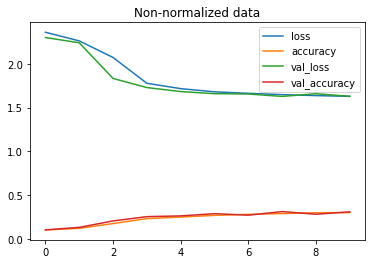

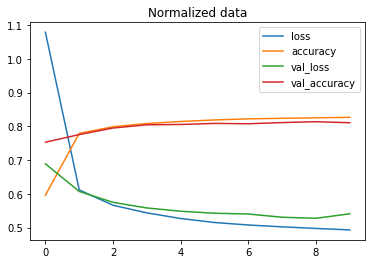

In [ ]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")

# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

**Note:** The same model with even *slightly* different data can produce *dramatically* different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (ex. same architecture but different data or same data but different architecture).

In [ ]:
## Finding the ideal learning rate
# Set random seed
tf.random.set_seed = 24

# Create the model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),                                
  tf.keras.layers.Dense(4, activation="relu"),                                
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 7s 3ms/step - loss: 1.2715 - accuracy: 0.5493 - val_loss: 0.8991 - val_accuracy: 0.6890 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7428 - accuracy: 0.7382 - val_loss: 0.7133 - val_accuracy: 0.7486 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6746 - accuracy: 0.7548 - val_loss: 0.6986 - val_accuracy: 0.7529 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6524 - accuracy: 0.7630 - val_loss: 0.6678 - val_accuracy: 0.7550 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6408 - accuracy: 0.7664 - val_loss: 0.6560 - val_accuracy: 0.7566 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6293 - accuracy: 0.7707 - val_loss: 0.6487 - val_accuracy: 0.7668 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'Finding the ideal learning rate')

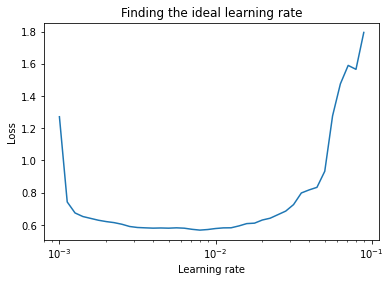

In [ ]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [ ]:
# Let's refit a model with the ideal learning rate

# Set random seed
tf.random.set_seed = 24

# Create model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),                                
  tf.keras.layers.Dense(4, activation="relu"),                                
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

# Fit the model
history_14 = model_14.fit(train_data_norm,
                          train_labels,
                          epochs=20,
                          validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2878 - accuracy: 0.5347 - val_loss: 0.9789 - val_accuracy: 0.6826
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7655 - accuracy: 0.7538 - val_loss: 0.6683 - val_accuracy: 0.7844
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6167 - accuracy: 0.7967 - val_loss: 0.6216 - val_accuracy: 0.7922
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5749 - accuracy: 0.8069 - val_loss: 0.5830 - val_accuracy: 0.8041
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5524 - accuracy: 0.8126 - val_loss: 0.5742 - val_accuracy: 0.8069
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5388 - accuracy: 0.8166 - val_loss: 0.5603 - val_accuracy: 0.8089
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5284 - accuracy: 0.8206 - val_loss: 0.5575 - val_accuracy:

## Evaluating our multi-class classification model

To evaluate our multi-class classification model we could:
* Evaluate its performance using other classification metrics (such as a confusion matrix)
* Asses some of its predictions (through visualization)
* Improve its results (by training it for longer or changing the architecture)
* Save and export it for use in an application

Let's go through the top2...

In [72]:
# Create a confusion matrix

import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):

  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)

  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis label to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  # itertools.product input (0,1,2), (0,1,2) => output [(0,0),(0,1),(0,2), (1,0),(1,1),(1,2) ...]
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [57]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
# Make some predictions with our model
y_probs = model_14.predict(test_data_norm) # probs is short for "prediction probabilities"

# View the first 5 predictions
y_probs[:5]

array([[4.86432555e-07, 8.80360628e-12, 1.44564583e-10, 3.52357142e-06,
        3.43321069e-08, 1.19603604e-01, 1.79350468e-06, 7.00826421e-02,
        1.88831650e-02, 7.91424692e-01],
       [6.54260395e-04, 2.80176771e-10, 8.32995951e-01, 2.66633151e-06,
        3.66737805e-02, 9.23210882e-31, 1.29672498e-01, 1.39792762e-26,
        8.35413573e-07, 1.07234131e-23],
       [1.03790988e-03, 9.74144638e-01, 5.53121092e-03, 3.46341357e-03,
        2.15660362e-03, 9.69604868e-03, 1.36660005e-03, 1.75569742e-03,
        8.35408922e-04, 1.23930458e-05],
       [1.03790988e-03, 9.74144638e-01, 5.53121092e-03, 3.46341357e-03,
        2.15660362e-03, 9.69604868e-03, 1.36660005e-03, 1.75569742e-03,
        8.35408922e-04, 1.23930458e-05],
       [1.48971424e-01, 1.53146044e-04, 1.67360440e-01, 6.81038201e-02,
        7.55973458e-02, 1.46754501e-11, 5.34219086e-01, 1.19619306e-11,
        5.59476763e-03, 7.84582177e-10]], dtype=float32)

**Note:** Remember to make predictions on the same kind of data your model was trained on (ex. if your model was trained on normalized data, you'll want to make predictions on normalized data).

In [ ]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([4.86432555e-07, 8.80360628e-12, 1.44564583e-10, 3.52357142e-06,
        3.43321069e-08, 1.19603604e-01, 1.79350468e-06, 7.00826421e-02,
        1.88831650e-02, 7.91424692e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [ ]:
# Convert all of the prediction probabilityes into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[736,  10,  37,  79,   1,   5, 112,   0,  20,   0],
       [  0, 959,   7,  26,   5,   0,   0,   1,   2,   0],
       [ 20,  12, 758,   8, 128,   1,  63,   0,  10,   0],
       [ 34,  38,  18, 819,  38,   3,  37,   1,  12,   0],
       [  0,   6, 148,  28, 750,   0,  57,   0,  11,   0],
       [  0,   2,   0,   1,   0, 915,   0,  43,   7,  32],
       [129,  12, 162,  50, 125,   1, 488,   1,  32,   0],
       [  0,   0,   0,   0,   0,  46,   0, 922,   1,  31],
       [  4,   2,   7,   7,   4,   7,  28,  12, 929,   0],
       [  0,   0,   0,   0,   0,  32,   0,  52,   4, 912]])

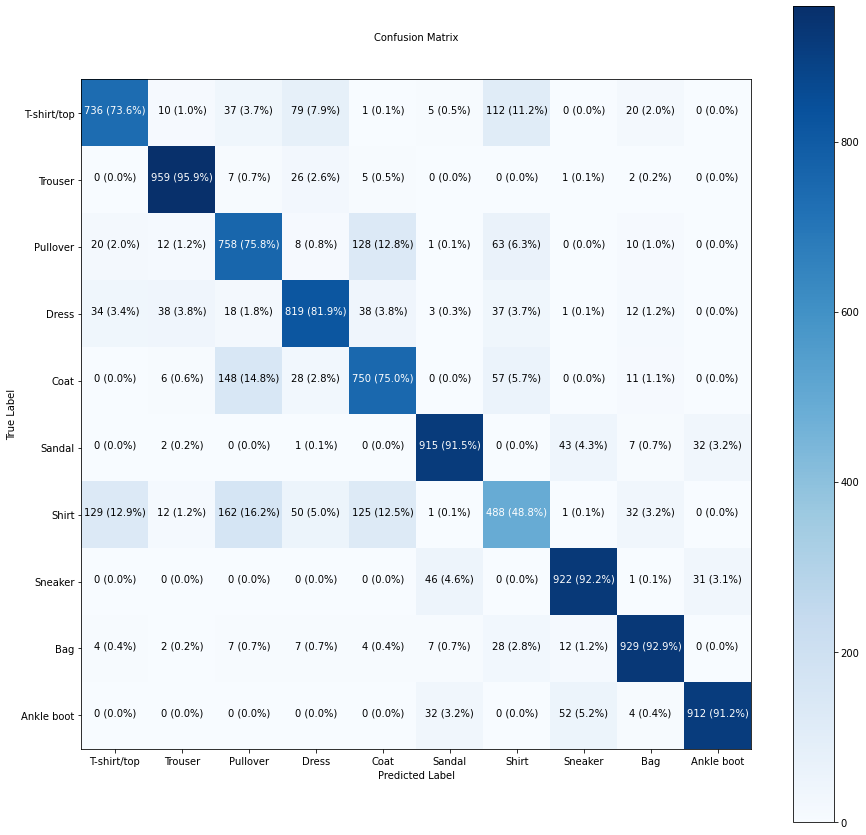

In [ ]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

**Note:** Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of your models.

How about we create a fun little function for:
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label & the predicted label

In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label.
  """
  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label, 
                                                   100*tf.reduce_max(pred_probs), 
                                                   true_label), 
             color=color) # Set the color to green or red based on if prediction is right or wrong

             

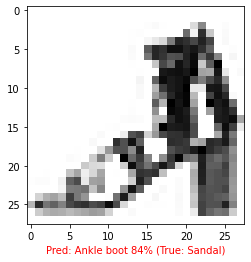

In [ ]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data_norm,  # Always make predictions on the same kind of data your model was trained on
                  true_labels=test_labels,
                  classes=class_names)

## What patterns is our model learning?

In [ ]:
# Find the layers of our most recent model
model_14.layers

In [ ]:
# Extract a particular layer
model_14.layers[1]

In [ ]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[-0.3424691 ,  0.10191474,  0.6601597 ,  0.00835339],
        [-0.33548927, -0.41110745,  0.7343966 , -0.94164747],
        [-0.90382725, -0.97689223,  0.6943673 , -0.5129259 ],
        ...,
        [ 0.19610673, -0.3816038 , -0.0265456 , -0.44882664],
        [ 0.5009974 , -0.05451908, -0.5445343 , -0.24597242],
        [ 0.26399946, -0.37259895,  0.5564287 ,  0.01225139]],
       dtype=float32), (784, 4))

Now let's check out the bias vector...

In [ ]:
# Bias and biases shapes
biases, biases.shape

(array([-0.20775467,  2.0492995 ,  1.2495385 ,  1.0381626 ], dtype=float32),
 (4,))

Every neuron has a bias vector. Each of these is paired with a weight matrix.

The bias vector get initialized as zeros (at least in the case of a TensorFlow Dense layer).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer. 

In [ ]:
model_14.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_27 (Dense)            (None, 4)                 3140      
                                                                 
 dense_28 (Dense)            (None, 4)                 20        
                                                                 
 dense_29 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


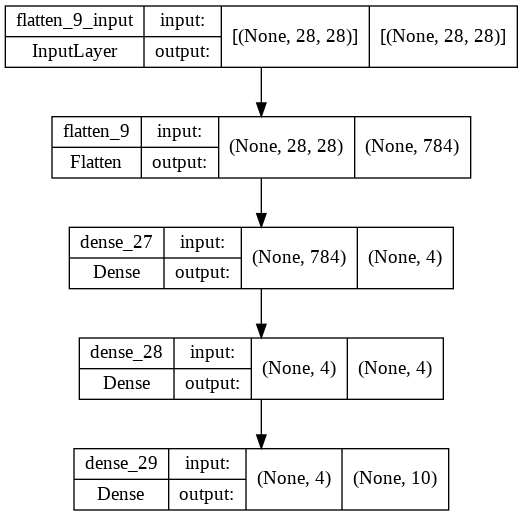

In [ ]:
# Let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)

# Next: Check out excercises and extra curriculum...

In [13]:
# Replicate a network on playground.tensorflow.org
from sklearn.datasets import make_circles

# Make 1000 example
n_samples = 600

# Create circle
X, y = make_circles(n_samples=n_samples,noise=0.1,factor=0.3, random_state=24)


In [14]:
# Check out features and label
X[:10], y[:10]

(array([[ 0.40308184, -0.21609697],
        [-0.02227423, -0.50214258],
        [-0.03475572,  1.00866402],
        [ 0.11670828, -0.343275  ],
        [ 0.14476263, -0.25079515],
        [-0.21851347, -1.06136744],
        [ 0.09392062, -0.17318625],
        [-0.9284501 , -0.55379845],
        [ 0.20261354, -0.07172463],
        [-1.05444218, -0.10328947]]), array([1, 1, 0, 1, 1, 0, 1, 0, 1, 0]))

In [15]:
# Visualize this data
import pandas as pd

circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1],"label":y})
circles.head()

,X0,X1,label
0,0.403082,-0.216097,1
1,-0.022274,-0.502143,1
2,-0.034756,1.008664,0
3,0.116708,-0.343275,1
4,0.144763,-0.250795,1


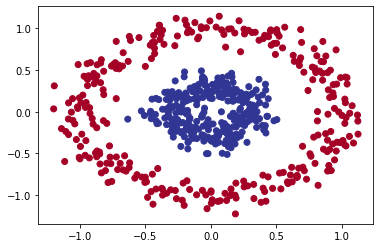

In [16]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [23]:
import tensorflow as tf

# set random
tf.random.set_seed = 24

# Create the model
model_15 = tf.keras.Sequential([
  tf.keras.layers.Dense(6, activation="relu"),                                
  tf.keras.layers.Dense(6, activation="relu"),                                
  tf.keras.layers.Dense(6, activation="relu"),                                
  tf.keras.layers.Dense(6, activation="relu"),                                
  tf.keras.layers.Dense(6, activation="relu"),                                
  tf.keras.layers.Dense(1, activation="sigmoid")                                
])

# Compile the model
model_15.compile(loss=tf.keras.losses.binary_crossentropy,
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

# Fit the model
history_15 = model_15.fit(X, y, epochs=100, verbose=0)

In [24]:
# Evaluate the model
model_15.evaluate(X, y)

19/19 [==============================] - 1s 7ms/step - loss: 0.0910 - accuracy: 1.0000


[0.0910034030675888, 1.0]

doing binary classification


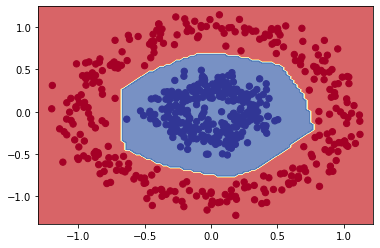

In [27]:
# Plot the decision boundary
plot_decision_boundary(model_15, X, y)

Use skikit-learn `make_moons()` function

In [30]:
from sklearn.datasets import make_moons

# Make 600 samples
n_samples= 600

# Create the data
X, y = make_moons(n_samples,noise=0.05,random_state=24)

X.shape, y.shape

((600, 2), (600,))

In [31]:
# View the data
import pandas as pd
moons = pd.DataFrame({"X0":X[:,0], "X1":X[:,1],"label":y})
moons.head()

,X0,X1,label
0,2.046851,0.276916,1
1,1.725500,-0.257476,1
2,0.671860,0.678022,0
3,1.681638,-0.355155,1
4,1.891046,0.095206,1


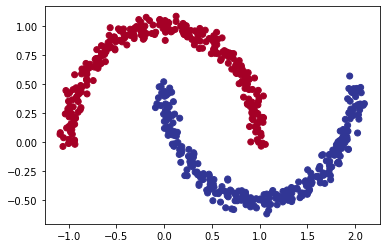

In [32]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [33]:
import tensorflow as tf

# set random
tf.random.set_seed = 24

# create the model
model_16 = tf.keras.Sequential([
  tf.keras.layers.Dense(4),                                
  tf.keras.layers.Dense(4),                                
  tf.keras.layers.Dense(1)
])

# Compile the model
model_16.compile(loss=tf.keras.losses.binary_crossentropy,
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

# Fit the model
history_16 = model_16.fit(X, y, epochs=100, verbose=0)

# Evaluate the model
model_16.evaluate(X, y)

19/19 [==============================] - 0s 2ms/step - loss: 0.2284 - accuracy: 0.8817


[0.2283640056848526, 0.8816666603088379]

Train a model to get 88% accuracy on fashion MNIST test set

In [35]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [39]:
# Check the shape
train_data.shape, test_data.shape, train_labels.shape, test_labels.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [41]:
# get max min of input and label
train_data.max(), train_data.min()

(255, 0)

In [54]:
# List of labels value
import numpy as np
label_val, label_no = tf.unique(train_labels)
np.sort(label_val.numpy())

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [59]:
# Data normalization
train_data_norm = train_data / 255.
test_data_norm = test_data / 255.

train_data_norm.max(), train_data_norm.min()

(1.0, 0.0)

In [55]:
# Create a small list so we can index onto our training labels so they're human-readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

In [64]:
# Find the ideal learning rate

# Set random
tf.random.set_seed = 24

# Create the model
model_17 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(6, activation="relu"),
  tf.keras.layers.Dense(6, activation="relu"),
  tf.keras.layers.Dense(6, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_17.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch/20.))

# Fit the model
find_lr_history = model_17.fit(train_data_norm, 
                               train_labels, 
                               epochs=40, 
                               validation_data=(test_data_norm, test_labels), 
                               callbacks=[lr_scheduler],
                               verbose=0)

Text(0.5, 1.0, 'Learning rate vs loss')

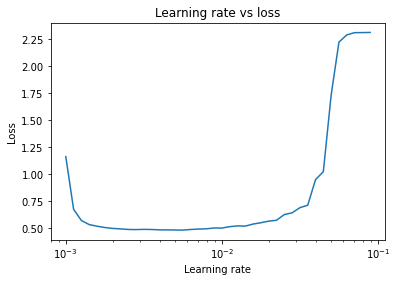

In [65]:
# Plot the learning rate
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * 10 ** (np.arange(40)/20)
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs loss")

In [73]:
# Fit the model again with best learning rate
tf.random.set_seed = 24

# Create the model
model_18 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])
  
# Compile the model
model_18.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

# Fit the model
history_18 = model_18.fit(train_data_norm, 
                          train_labels, 
                          epochs=60, 
                          validation_data=(test_data_norm, test_labels))

Epoch 1/60
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5397 - accuracy: 0.8123 - val_loss: 0.4577 - val_accuracy: 0.8360
Epoch 2/60
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3968 - accuracy: 0.8580 - val_loss: 0.4075 - val_accuracy: 0.8511
Epoch 3/60
1875/1875 [==============================] - 8s 5ms/step - loss: 0.3525 - accuracy: 0.8731 - val_loss: 0.3714 - val_accuracy: 0.8662
Epoch 4/60
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3295 - accuracy: 0.8800 - val_loss: 0.3855 - val_accuracy: 0.8621
Epoch 5/60
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3133 - accuracy: 0.8849 - val_loss: 0.3702 - val_accuracy: 0.8673
Epoch 6/60
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2989 - accuracy: 0.8908 - val_loss: 0.3574 - val_accuracy: 0.8774
Epoch 7/60
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2869 - accuracy: 0.8942 - val_loss: 0.3422 - val_accuracy

In [74]:
# Make prediction with our models
y_probs = model_18.predict(test_data_norm)

# Convert all prediction to integer
y_preds = y_probs.argmax(axis=1)

# View 10 1st prediction
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [75]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[808,  10,  18,  13,   1,   1, 142,   0,   7,   0],
       [  2, 982,   3,   6,   5,   0,   1,   0,   1,   0],
       [ 18,   9, 803,  11,  89,   0,  68,   1,   1,   0],
       [ 29,  12,  12, 865,  48,   1,  29,   0,   4,   0],
       [  1,   2,  94,  24, 827,   0,  51,   0,   1,   0],
       [  0,   0,   0,   1,   0, 950,   0,  33,   2,  14],
       [ 97,   7,  74,  23,  75,   1, 712,   0,  11,   0],
       [  0,   0,   0,   0,   0,   6,   0, 978,   0,  16],
       [  8,   1,   8,   6,   2,   2,   5,   4, 964,   0],
       [  0,   2,   0,   0,   0,  10,   1,  41,   0, 946]])

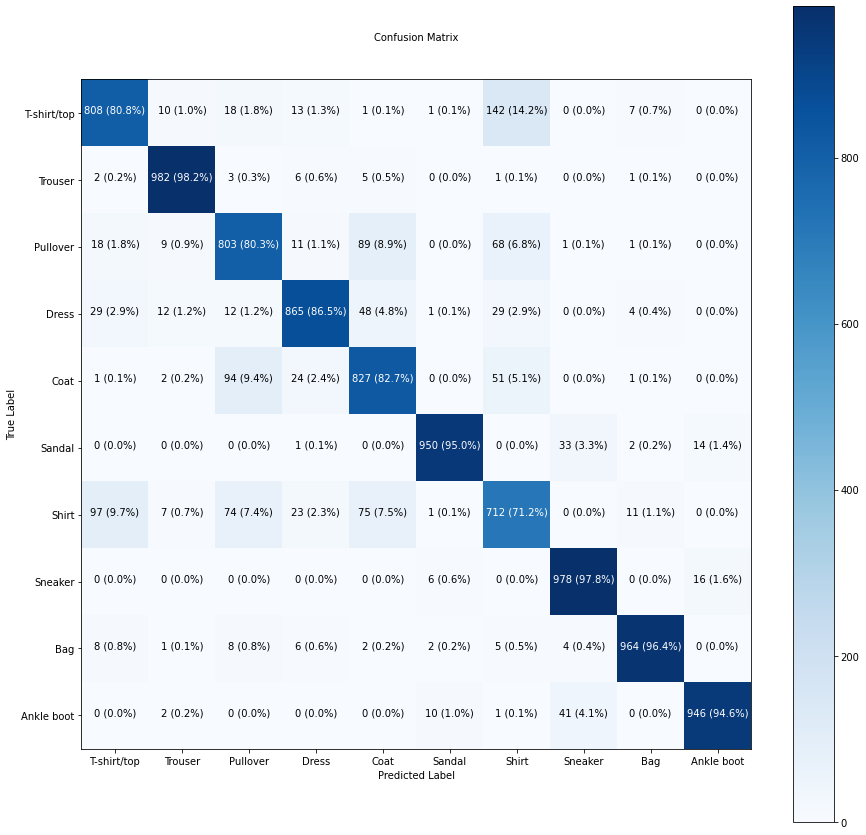

In [78]:
# Visualize the confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15,15),
                      text_size=10)

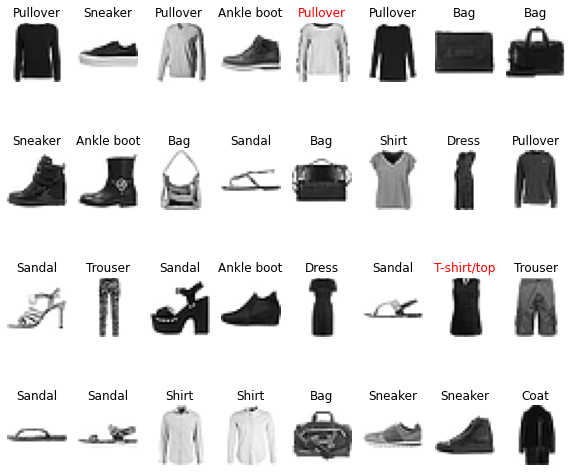

In [100]:
# Plot multiple random images of fashion MNIST
import random
rows = 4
cols = 8

figH = (rows-1)*3 if (rows-1)*3 > 0 else 2
plt.figure(figsize=(cols+2, figH))

for i in range(rows*cols):
  ax = plt.subplot(rows, cols, i+1)
  rand_index = random.choice(range(len(test_data)))
  plt.imshow(test_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[y_preds[rand_index]], 
            color="black" if test_labels[rand_index] == y_preds[rand_index] else "red")
  plt.axis(False)

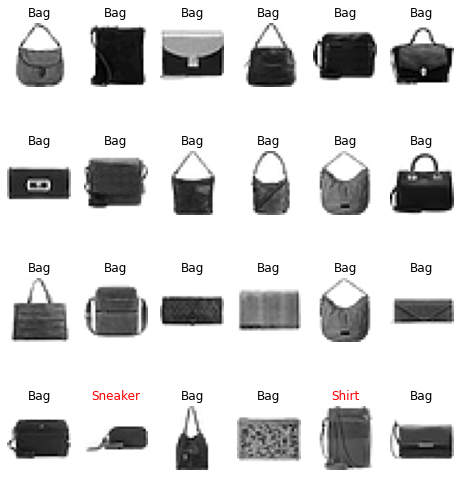

In [101]:
# View image of certain class
import random

className = "Bag"
rows = 4
cols = 6

figH = (rows-1)*3 if (rows-1)*3 > 0 else 2

plt.figure(figsize=(cols+2, figH))

for i in range(rows * cols):
  ax = plt.subplot(rows, cols, i+1)
  while True:
    rand_index = random.choice(range(len(test_data)))  
    if (class_names[test_labels[rand_index]] == className):
      plt.imshow(test_data[rand_index], cmap=plt.cm.binary)
      plt.title(class_names[y_preds[rand_index]], 
              color="black" if test_labels[rand_index] == y_preds[rand_index] else "red")
      plt.axis(False)
      break
  

In [102]:
# Softmax function
input = tf.constant([[3,4,1]], dtype = tf.float32)
output = tf.nn.softmax(input)
output.numpy()

array([[0.25949648, 0.70538455, 0.03511903]], dtype=float32)

In [110]:
# Create a similar function
def mySoftmax(input):
  output = tf.exp(input - tf.reduce_max(input)) / tf.reduce_sum(tf.exp(input - tf.reduce_max(input)))
  return output.numpy()

# Not like this
def mySoftmax2(input):
  output = tf.exp(input) / tf.reduce_sum(tf.exp(input))
  return output.numpy()

mySoftmax(input)
mySoftmax2(input)

array([[0.25949645, 0.7053845 , 0.03511903]], dtype=float32)